<a href="https://colab.research.google.com/github/vcdemy/20230205-python/blob/main/20230219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20230219 筆記

## 回答問題

### Q: "%" 怎麼使用？

參考：https://python.microbit.org/v/3

嘗試執行底下程式，按按鈕A觀察結果！

```python
# Imports go at the top
from microbit import *

display.clear()

x = 0
y = 0
display.set_pixel(x,y,9)

while True:
    if button_a.was_pressed():
        x = x + 1
        display.clear()
        display.set_pixel(x%5,y,9)
```

## 複習一下 requests 的使用

從政府資料開放平台抓資料：https://data.gov.tw/

### 練習

抓取`年度國內主要金融指標`下來做分析:

https://apiservice.mol.gov.tw/OdService/download/A17000000J-030244-dpp

In [3]:
import requests

In [4]:
url = "https://apiservice.mol.gov.tw/OdService/download/A17000000J-030244-dpp"

In [5]:
data = requests.get(url).json()

In [ ]:
# 列出data裡面的東西
data

In [7]:
# 檢視data的資料型態
type(data)

list

In [8]:
# 檢視一下 data 裡面有幾筆資料
len(data)

29

In [9]:
# 檢視一下 data 的第一筆資料
data[0]

{'年度': '1994',
 '貨幣供給額期底年增率-M1B': '12.23',
 '貨幣供給額期底年增率-M2': '15.07',
 '金價（美元／英兩）-國際現貨黃金價格': '382.50',
 '金價（美元／英兩）-台北': '385.07',
 '匯率（月底）-（新台幣／美元）': '26.240',
 '外匯存底（億美元）': '924.54',
 '利率（年息%）-金融業拆款': '6.130',
 '利率（年息%）-商業本票31-90天期': '6.77',
 '利率（年息%）-中央銀行重貼現率': '5.500',
 '利率（年息%）-債券市場（十年期中央政府公債）': '7.24',
 '證券（集中市場）-發行量加權股價指數（月底）': '7124.66',
 '證券（集中市場）-成交值（億元）': '194766'}

### 列出各年度的M2貨幣供給額

#### 方法一

In [10]:
for i in data:
  print(i['年度'], "==>", i['貨幣供給額期底年增率-M2'])

1994 ==> 15.07
1995 ==> 9.42
1996 ==> 9.13
1997 ==> 8.02
1998 ==> 8.56
1999 ==> 8.29
2000 ==> 6.50
2001 ==> 4.31
2002 ==> 2.53
2003 ==> 5.68
2004 ==> 7.19
2005 ==> 6.63
2006 ==> 5.15
2007 ==> 0.84
2008 ==> 7.21
2009 ==> 5.78
2010 ==> 5.44
2011 ==> 4.84
2012 ==> 3.46
2013 ==> 5.79
2014 ==> 6.13
2015 ==> 5.80
2016 ==> 3.55
2017 ==> 3.56
2018 ==> 2.65
2019 ==> 4.52
2020 ==> 9.36
2021 ==> 7.35
2022 ==> 6.74


#### 方法二

In [14]:
for i in range(len(data)):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [12]:
for i in range(len(data)):
  print(data[i]['年度'], "==>", data[i]['貨幣供給額期底年增率-M2'])

1994 ==> 15.07
1995 ==> 9.42
1996 ==> 9.13
1997 ==> 8.02
1998 ==> 8.56
1999 ==> 8.29
2000 ==> 6.50
2001 ==> 4.31
2002 ==> 2.53
2003 ==> 5.68
2004 ==> 7.19
2005 ==> 6.63
2006 ==> 5.15
2007 ==> 0.84
2008 ==> 7.21
2009 ==> 5.78
2010 ==> 5.44
2011 ==> 4.84
2012 ==> 3.46
2013 ==> 5.79
2014 ==> 6.13
2015 ==> 5.80
2016 ==> 3.55
2017 ==> 3.56
2018 ==> 2.65
2019 ==> 4.52
2020 ==> 9.36
2021 ==> 7.35
2022 ==> 6.74


## 資料分析基礎套件

* numpy ==> 科學運算基礎套件
* matplotlib ==> 繪圖基礎套件
* pandas ==> 資料分析基礎套件

### 套件載入的慣用法

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```

### NumPy

NumPy ==> **Num**erical **Py**thon

* ndarray (多維陣列) ==> N-Dimensional Arrays
* ufunc (通用函式) ==> Universal Functions

In [15]:
import numpy as np

### ndarray

#### 原生的python的容器型別的限制

無法簡單的做到科學運算(向量運算)！

In [16]:
x = [1, 2, 3]
y = [4, 5, 6]

In [17]:
x + y

[1, 2, 3, 4, 5, 6]

In [18]:
2 * x

[1, 2, 3, 1, 2, 3]

#### 使用numpy的ndarray來解決科學運算的問題

In [20]:
x1 = np.array(x)
y1 = np.array(y)

In [21]:
type(x1)

numpy.ndarray

In [23]:
x1

array([1, 2, 3])

In [24]:
y1

array([4, 5, 6])

In [22]:
x1 + y1

array([5, 7, 9])

In [25]:
2 * x1

array([2, 4, 6])

### ufunc

#### 原生的python的數學運算

In [26]:
import math

In [27]:
math.pi

3.141592653589793

In [28]:
math.sin(math.pi/2)

1.0

In [30]:
math.sin(x)

TypeError: ignored

#### 比較一下 numpy 的使用

In [31]:
np.pi

3.141592653589793

In [33]:
np.sin(np.pi/2)

1.0

In [34]:
np.sin(x)

array([0.84147098, 0.90929743, 0.14112001])

### ndarray 附帶的屬性 (properties)

In [35]:
x

[1, 2, 3]

In [36]:
x1

array([1, 2, 3])

In [37]:
# 資料型態
x1.dtype

dtype('int64')

In [38]:
# 資料的形狀
x1.shape

(3,)

In [40]:
# 資料的個數
x1.size

3

### ndarray 的 indexing 跟 slicing

In [50]:
# np.arange() 類似 range()，但是會產生ndarray
F = np.arange(25)

In [51]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [52]:
F.dtype

dtype('int64')

In [53]:
F.shape

(25,)

In [54]:
F.reshape(5, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [55]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [56]:
G = F.reshape(5, 5)

In [57]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [58]:
G.shape

(5, 5)

#### indexing

In [59]:
F

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [60]:
F[0]

0

In [61]:
F[-1]

24

In [62]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [63]:
G[2]

array([10, 11, 12, 13, 14])

In [64]:
G[2][2]

12

In [65]:
G[2, 2]

12

#### slicing

In [66]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [67]:
G[1:3, 1:3]

array([[ 6,  7],
       [11, 12]])

## 回答問題

### Q: 如果np的ufunc都會主動將list轉換成ndarray，我們是不是可以省略 np.array(x) 這樣的轉換？

In [68]:
x

[1, 2, 3]

In [69]:
x ** 2

TypeError: ignored

In [70]:
x1 ** 2

array([1, 4, 9])

### 練習

請問如何取得二維的ndarray的第一欄及最後一欄的資料？

In [71]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [72]:
G[:,0]

array([ 0,  5, 10, 15, 20])

In [73]:
G[:,-1]

array([ 4,  9, 14, 19, 24])

In [74]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [75]:
G[:, 0] = 0

In [76]:
G

array([[ 0,  1,  2,  3,  4],
       [ 0,  6,  7,  8,  9],
       [ 0, 11, 12, 13, 14],
       [ 0, 16, 17, 18, 19],
       [ 0, 21, 22, 23, 24]])

In [77]:
G[1:3, 1:3]

array([[ 6,  7],
       [11, 12]])

In [78]:
G[1:3, 2]

array([ 7, 12])

## MatPlotLib

MatPlotLib ==> **Mat**rix **Plot**ting **Lib**rary

* pyplot
* artist

Reference:
https://matplotlib.org/stable/index.html

In [84]:
import matplotlib.pyplot as plt

### 折線圖 (Line Chart)

In [80]:
x

[1, 2, 3]

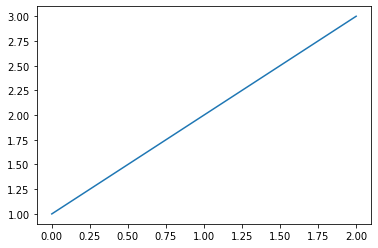

In [81]:
plt.plot(x)

### Markers, Line Styles, Colors

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

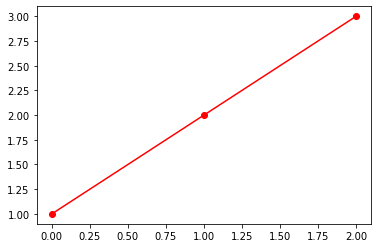

In [82]:
plt.plot(x, "ro-")

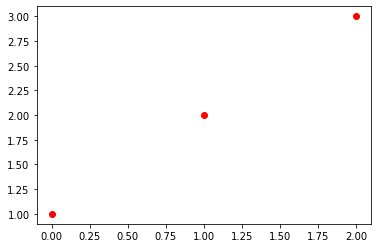

In [83]:
plt.plot(x, "ro")

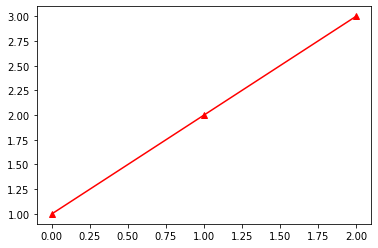

In [85]:
plt.plot(x, "^r-")

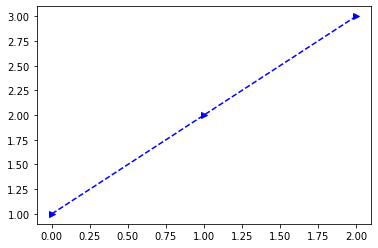

In [87]:
plt.plot(x, "b>--")

In [88]:
x

[1, 2, 3]

In [89]:
x**2

TypeError: ignored

In [90]:
x1

array([1, 2, 3])

In [91]:
x1**2

array([1, 4, 9])

In [92]:
x1**3

array([ 1,  8, 27])

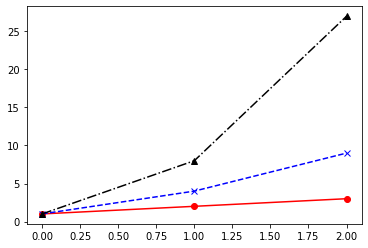

In [93]:
plt.plot(x1, "ro-")
plt.plot(x1**2, "bx--")
plt.plot(x1**3, "k^-.")

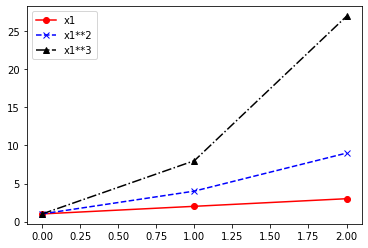

In [94]:
plt.plot(x1, "ro-", label="x1")
plt.plot(x1**2, "bx--", label="x1**2")
plt.plot(x1**3, "k^-.", label="x1**3")
plt.legend()

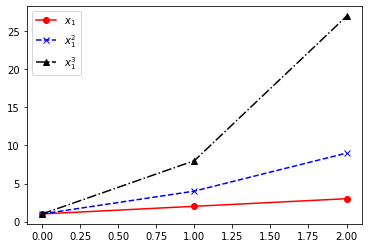

In [95]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()

Text(0.5, 1.0, 'The power of x1')

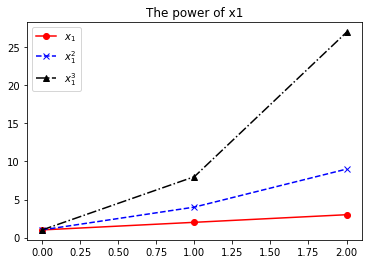

In [96]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()
plt.title("The power of x1")

Text(0, 0.5, 'Axis y')

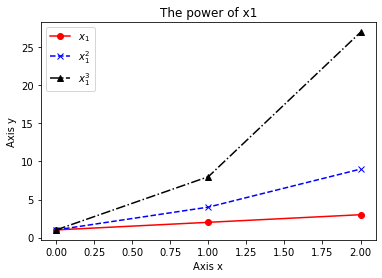

In [97]:
plt.plot(x1, "ro-", label="$x_1$")
plt.plot(x1**2, "bx--", label="$x_1^2$")
plt.plot(x1**3, "k^-.", label="$x_1^3$")
plt.legend()
plt.title("The power of x1")
plt.xlabel("Axis x")
plt.ylabel("Axis y")

### 長條圖 (Bar Chart)

In [98]:
x

[1, 2, 3]

In [99]:
plt.bar?

In [100]:
c = ['a', 'b', 'c']

<BarContainer object of 3 artists>

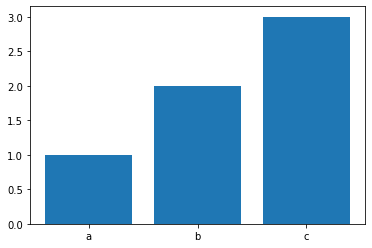

In [101]:
plt.bar(c, x)

### 圓餅圖 (Pie Chart)

In [102]:
plt.pie?

([<matplotlib.patches.Wedge at 0x7fc6a32c50a0>,
 [Text(0.9526279355804298, 0.5500000148652441, 'a'),
  Text(-0.5500000594609755, 0.9526279098330699, 'b'),
  Text(1.0298943251329445e-07, -1.0999999999999954, 'c')])

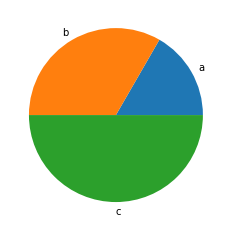

In [103]:
plt.pie(x, labels=c)

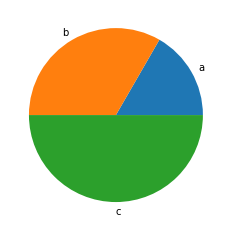

In [104]:
plt.pie(x, labels=c);

## 補充說明：

Python 常用來做影像處理的套件，大概有三個：

* pillow (PIL)
* skimage
* opencv


In [105]:
from PIL import Image

In [106]:
lin = Image.open('lin.jpg')

In [117]:
type(lin)

PIL.JpegImagePlugin.JpegImageFile

In [108]:
lin_array = np.array(lin)

In [118]:
type(lin_array)

numpy.ndarray

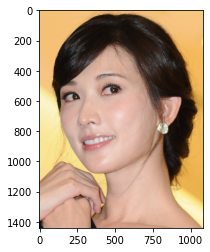

In [109]:
plt.imshow(lin_array)

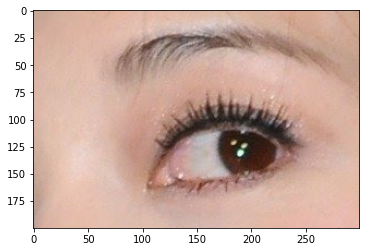

In [119]:
plt.imshow(lin_array[400:600, 300:600])

## Pandas

* Series
* DataFrame

### 讀取股價歷史資料

In [ ]:
!pip install yfinance

In [111]:
import yfinance as yf

In [112]:
df = yf.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [113]:
type(df)

pandas.core.frame.DataFrame

### 檢視股價歷史資料

In [114]:
# 檢視前五筆資料
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [115]:
# 檢視後五筆資料
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,194.419998,196.300003,187.610001,194.639999,194.639999,172475500
2023-02-14,191.940002,209.820007,189.440002,209.250000,209.250000,216455700
2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200


In [116]:
# 檢視資料的摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3183 entries, 2010-06-29 to 2023-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3183 non-null   float64
 1   High       3183 non-null   float64
 2   Low        3183 non-null   float64
 3   Close      3183 non-null   float64
 4   Adj Close  3183 non-null   float64
 5   Volume     3183 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 174.1 KB


### 練習

抓取SP500成分股的 symbol。

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [120]:
import pandas as pd

In [121]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [122]:
df_list = pd.read_html(url)

In [124]:
df_list[0].Symbol

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [125]:
SP500 = pd.read_html(url)[0].Symbol

### 分析投資報酬率

In [126]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [127]:
type(df)

pandas.core.frame.DataFrame

#### 讀取單一個欄位

In [128]:
df.Close

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-02-13    194.639999
2023-02-14    209.250000
2023-02-15    214.240005
2023-02-16    202.039993
2023-02-17    208.309998
Name: Close, Length: 3183, dtype: float64

In [129]:
df['Close']

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-02-13    194.639999
2023-02-14    209.250000
2023-02-15    214.240005
2023-02-16    202.039993
2023-02-17    208.309998
Name: Close, Length: 3183, dtype: float64

In [130]:
type(df.Close)

pandas.core.series.Series

In [131]:
df[['Open', 'Close']]

,Open,Close
Date,,
2010-06-29,1.266667,1.592667
2010-06-30,1.719333,1.588667
2010-07-01,1.666667,1.464000
2010-07-02,1.533333,1.280000
2010-07-06,1.333333,1.074000
...,...,...
2023-02-13,194.419998,194.639999
2023-02-14,191.940002,209.250000
2023-02-15,211.759995,214.240005


In [132]:
df.head?

#### 計算投資報酬率

In [134]:
df.Close

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-02-13    194.639999
2023-02-14    209.250000
2023-02-15    214.240005
2023-02-16    202.039993
2023-02-17    208.309998
Name: Close, Length: 3183, dtype: float64

In [135]:
df.Close[0]

1.5926669836044312

In [136]:
df.Close[-1]

208.30999755859375

In [137]:
df.Close[-1]/df.Close[0]

130.79319135953875

In [138]:
ret = df.Close[-1]/df.Close[0]

In [140]:
ret

130.79319135953875

#### 計算2023年初買進持有到現在的資產變化

In [141]:
df['2023'].Close[0]

<ipython-input-141-219dca36fd8f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2023'].Close[0]


108.0999984741211

In [142]:
df.loc['2023'].Close[0]

108.0999984741211

In [143]:
df.loc['2023'].Close[-1]/df.loc['2023'].Close[0]

1.9270120305178609

#### 計算2022年十月初買進持有到2023年一月底的資產變化

In [145]:
df.loc['2022-10':'2023-01'].Close[-1]/df.loc['2022-10':'2023-01'].Close[0]

0.7146039834253288

In [146]:
df.loc['2022-10':'2023-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
...,...,...,...,...,...,...
2023-01-25,141.910004,146.410004,138.070007,144.429993,144.429993,192734300
2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100
2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,305632100


### 資料視覺化

#### 繪製收盤曲線

In [147]:
df.loc['2023']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220575900
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
2023-01-10,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
2023-01-11,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
2023-01-12,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
2023-01-13,116.550003,122.629997,115.599998,122.400002,122.400002,180439300


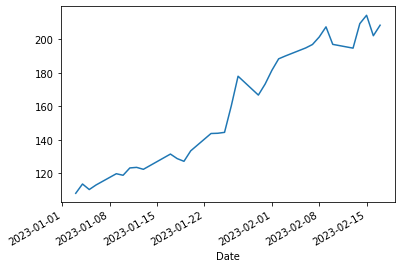

In [149]:
df.loc['2023'].Close.plot()

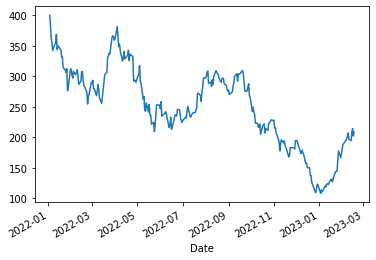

In [150]:
df.loc['2022':].Close.plot()

#### 繪製K線圖

https://github.com/matplotlib/mplfinance

In [152]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 6.8 MB/s eta 0:00:00


In [153]:
import mplfinance as mpf

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


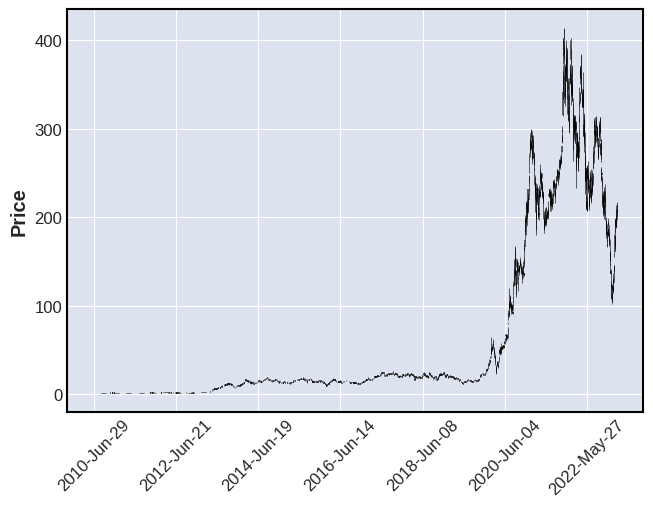

In [154]:
mpf.plot(df,type='candle')

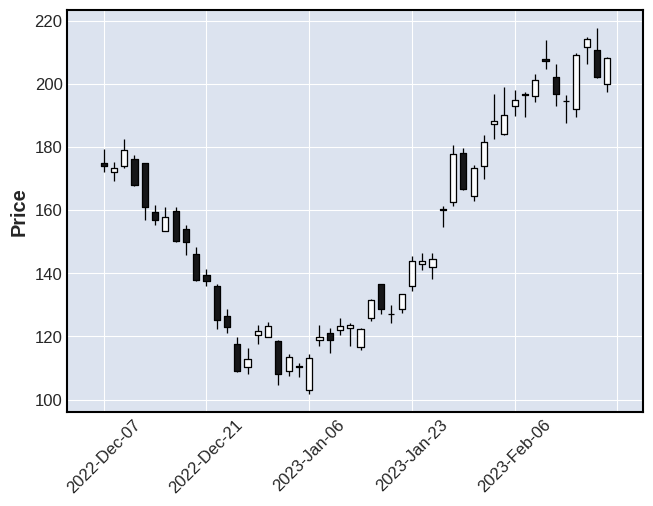

In [155]:
mpf.plot(df.tail(50),type='candle')

### 回家練習

分析台積電的股價 (2330.tw)。
* 下載歷史股價
* 分析歷史股價第一筆到最近一筆資料的資產變化情形
* 分析2022年自2023年間，從何時切入投資報酬率最大
* 繪製台積電收盤價曲線

In [156]:
# hint: 尋找股價最低點
df.Close.min()

1.053333044052124

In [164]:
# 回傳boolean index
df.Close == df.Close.min()

Date
2010-06-29    False
2010-06-30    False
2010-07-01    False
2010-07-02    False
2010-07-06    False
              ...  
2023-02-13    False
2023-02-14    False
2023-02-15    False
2023-02-16    False
2023-02-17    False
Name: Close, Length: 3183, dtype: bool

In [163]:
df[df.Close == df.Close.min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


### 使用 pandas 讀取政府資料開放平台上的 .csv 的資料

https://mopsfin.twse.com.tw/opendata/t187ap03_L.csv

In [157]:
url = "	https://mopsfin.twse.com.tw/opendata/t187ap03_L.csv"

In [158]:
twdf = pd.read_csv(url)

In [159]:
twdf.head()

,出表日期,公司代號,公司名稱,公司簡稱,外國企業註冊地國,產業別,住址,營利事業統一編號,董事長,總經理,...,過戶電話,過戶地址,簽證會計師事務所,簽證會計師1,簽證會計師2,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1120218,1101,臺灣水泥股份有限公司,台泥,－,1,台北市中山北路2段113號,11913502,張安平,程耀輝,...,66365566,台北市重慶南路一段83號5樓,勤業眾信聯合會計師事務所,黃惠敏,郭政弘,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1120218,1102,亞洲水泥股份有限公司,亞泥,－,1,台北市大安區敦化南路2段207號30、31樓,3244509,徐旭東,李坤炎,...,02-7753-1699,新北市板橋區新站路16號13樓,勤業眾信聯合會計師事務所,戴信維,陳培德,ACC,"30-31F., No.207, Sec. 2, Dunhua S. Rd., Da' an...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1120218,1103,嘉新水泥股份有限公司,嘉泥,－,1,台北市中山北路2段96號,11892801,張剛綸,王立心,...,(02)2702-3999,台北市敦化南路2段97號地下2樓,勤業眾信聯合會計師事務所,陳薔旬,梁盛泰,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,ir@chcgroup.com.tw,www.chcgroup.com.tw
3,1120218,1104,環球水泥股份有限公司,環泥,－,1,台北市南京東路二段125號10樓,7568009,侯博義,侯智升,...,02-23816288,台北市博愛路17號3樓,勤業眾信聯合會計師事務所,李季珍,楊朝欽,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1120218,1108,幸福水泥股份有限公司,幸福,－,1,台北市松江路237號15樓,40601248,陳兩傳,陳兩傳,...,2381-6288,台北市中正區博愛路17號3樓,勤業眾信聯合會計師事務所,陳招美,陳薔旬,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw


#### 使用pandas讀取0050成分股

https://www.yuantaetfs.com/api/StkWeights?date=&fundid=1066

In [160]:
df_0050 = pd.read_json("https://www.yuantaetfs.com/api/StkWeights?date=&fundid=1066")

In [161]:
df_0050

,code,ym,name,ename,weights,qty
0,2330,NaN,台積電,Taiwan Semiconductor Manufacturing Co. Ltd.,47.32,246446636
1,2317,NaN,鴻海,HON HAI PRECISION IND. CO. LTD.,4.70,122467572
2,2454,NaN,聯發科,MediaTek Inc.,4.09,15268781
3,2308,NaN,台達電,DELTA ELECTRONICS INC.,2.42,22170963
4,2303,NaN,聯電,UNITED MICROELECTRONICS CORP.,2.23,120151529
5,2881,NaN,富邦金,Fubon Financial Holding Co. Ltd.,1.69,75669138
6,2412,NaN,中華電,Chunghwa Telecom Co. Ltd,1.64,39032848
7,1303,NaN,南亞,NAN YA PLASTICS CORPORATION,1.63,57944327
8,2891,NaN,中信金,CTBC FINANCIAL HOLDING CO. LTD.,1.57,186193671
9,2882,NaN,國泰金,CATHAY FINANCIAL HOLDING CO. LTD.,1.50,91724297
